In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from ipywidgets import interact
from bokeh.models import MultiSelect

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, Slider, TextInput
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [4]:
!wget -O data/confirmed.csv $url_confirmed
!wget -O data/deaths.csv $url_death

--2020-04-21 17:29:02--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75974 (74K) [text/plain]
Saving to: ‘data/confirmed.csv’

data/confirmed.csv  100%[===================>]  74,19K  --.-KB/s    in 0,04s   

2020-04-21 17:29:02 (1,98 MB/s) - ‘data/confirmed.csv’ saved [75974/75974]

--2020-04-21 17:29:02--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP requ

In [5]:
df = pd.read_csv('data/confirmed.csv')

In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24


In [7]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [9]:
df[df['Country/Region']=='Germany'].sum(axis=0)

Province/State          0
Country/Region    Germany
Lat                    51
Long                    9
1/22/20                 0
                   ...   
4/16/20            137698
4/17/20            141397
4/18/20            143342
4/19/20            145184
4/20/20            147065
Length: 94, dtype: object

In [8]:
conttries = [(x,x) for x in df['Country/Region'].unique()]

In [19]:
df['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [18]:
df_sub = df[df['Country/Region']==country]

TypeError: diff() got an unexpected keyword argument 'axis'

In [37]:
absolute = df_sub[df.columns[4:]].sum(axis=0).to_frame(name='sum') 
new_cases = absolute.diff(axis=0).fillna(0)
new_cases_rolling = new_cases.rolling(window=7, axis=0).mean().fillna(0)

In [36]:
new_cases

,sum
1/22/20,0.0
1/23/20,0.0
1/24/20,4.0
1/25/20,2.0
1/26/20,0.0
...,...
4/16/20,25018.0
4/17/20,4078.0
4/18/20,38.0
4/19/20,9896.0


In [17]:
df_sub[df.columns[4:]].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         2
1/25/20         3
1/26/20         3
            ...  
4/16/20    147091
4/17/20    149130
4/18/20    149149
4/19/20    154097
4/20/20    156480
Length: 90, dtype: int64

In [12]:
absolute

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      5,      5,      5,
            5,      5,      5,      5,      5,      7,     11,     11,
           11,     11,     15,     18,     18,     20,     23,     28,
           28,     28,     28,     28,     43,     43,     51,     51,
           57,     61,     61,     72,     72,     77,     83,     83,
           83,     86,     86,     86,     86,     86,     96,     96,
           96,     97,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [46]:
def get_lines(country : str, rolling_window: int = 7):
    df_sub = df[df['Country/Region']==country]
    absolute = np.ravel(df_sub[df.columns[4:]].values)
    new_cases = np.ravel(df_sub[df.columns[4:]].diff(axis=1).fillna(0))
    new_cases_rolling = np.ravel(df_sub[df.columns[4:]].diff(axis=1).fillna(0).rolling(window=7, axis=1).mean().fillna(0))
    return absolute, new_cases, new_cases_rolling

In [38]:
absolute, new, new_rol =  get_lines('Germany')
x = list(range(0,len(new)))


In [39]:
source = ColumnDataSource(data=dict(x=x,absolute=absolute, new=new, new_rol=new_rol ))

In [40]:
source.data

{'x': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88],
 'absolute': array([     0,      0,      0,      0,      0,      1,      4,      4,
             4,      5,      8,     10,     12,     12,     12,     12,
            13,     13,     14,     14,     16,     16,     16,     16,
            16,     16,     16,     16,     16,     16,     16,     16,
            16,     16,     17,     27,     46,     48,     79,    130,
           159,    196,    262,    482,    670,    799,   1040,   1176,
          1457,   1908,   

In [43]:
p = figure(title="Newly Infected", plot_height=300, plot_width=600, y_range=(-100,max(new)+100),
           background_fill_color='#efefef')
r = p.line('x', 'new', source=source, color="#8888cc", line_width=1.5, alpha=0.8)
r = p.line('x', 'new_rol',source=source, color="red", line_width=1.5, alpha=0.8)
#r = p.line('x', 'new_rol', color="red", line_width=1.5, alpha=0.8)
multi_select = MultiSelect(title="Option:", value=['Germany'],
                           options=conttries)

In [48]:
def update_data(attrname, old, new):
    country = multi_select.value
    absolute, new, new_rol  = get_lines(country)
    x = list(range(0,len(new)))
    source.data = dict(x=x,absolute=absolute, new=new, new_rol=new_rol )

In [49]:
multi_select.on_change('value',update_data )

In [50]:
show(multi_select,notebook_handle=True)
show(p, notebook_handle=True)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [52]:
source.data.keys()

dict_keys(['x', 'absolute', 'new', 'new_rol'])

In [40]:
df.columns[-1]

'4/20/20'

In [41]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/16/20             int64
4/17/20             int64
4/18/20             int64
4/19/20             int64
4/20/20             int64
Length: 94, dtype: object

In [45]:
for index, row in df.iterrows():
    print(index,row["Lat"])

0 33.0
1 41.1533
2 28.0339
3 42.5063
4 -11.2027
5 17.0608
6 -38.4161
7 40.0691
8 -35.4735
9 -33.8688
10 -12.4634
11 -28.0167
12 -34.9285
13 -41.4545
14 -37.8136
15 -31.9505
16 47.5162
17 40.1431
18 25.0343
19 26.0275
20 23.685
21 13.1939
22 53.7098
23 50.8333
24 9.3077
25 27.5142
26 -16.2902
27 43.9159
28 -14.235
29 4.5353
30 42.7339
31 12.2383
32 16.5388
33 11.55
34 3.8480000000000003
35 53.9333
36 49.2827
37 37.6489
38 53.7609
39 46.5653
40 53.1355
41 44.681999999999995
42 51.2538
43 46.5107
44 52.9399
45 52.9399
46 6.6111
47 15.4542
48 -35.6751
49 31.8257
50 40.1824
51 30.0572
52 26.0789
53 37.8099
54 23.3417
55 23.8298
56 26.8154
57 19.1959
58 39.549
59 47.861999999999995
60 33.882
61 22.3
62 30.9756
63 27.6104
64 44.0935
65 32.9711
66 27.614
67 43.6661
68 41.2956
69 22.1667
70 37.2692
71 35.7452
72 35.1917
73 36.3427
74 31.201999999999998
75 37.5777
76 30.6171
77 39.3054
78 31.6927
79 41.1129
80 24.974
81 29.1832
82 4.5709
83 -4.0383
84 -4.0383
85 9.7489
86 7.54
87 45.1
88 0.0
89 

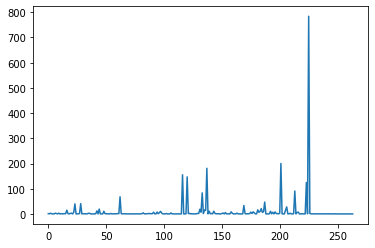

In [57]:
df[df.columns[-1]].apply(lambda x: x/1000).plot()

In [63]:
[len(df)*1]

[264]

In [65]:
np.ones(len(df))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [71]:
circle_source = ColumnDataSource(dict(x=df["Long"].values,
                                      y=df["Lat"].values,
                                      sizes=np.ones(len(df))
                                      )
                                 )

In [72]:
circle_source.data

{'x': array([  65.      ,   20.1683  ,    1.6596  ,    1.5218  ,   17.8739  ,
         -61.7964  ,  -63.6167  ,   45.0382  ,  149.0124  ,  151.2093  ,
         130.8456  ,  153.4     ,  138.6007  ,  145.9707  ,  144.9631  ,
         115.8605  ,   14.5501  ,   47.5769  ,  -77.3963  ,   50.55    ,
          90.3563  ,  -59.5432  ,   27.9534  ,    4.      ,    2.3158  ,
          90.4336  ,  -63.5887  ,   17.6791  ,  -51.9253  ,  114.7277  ,
          25.4858  ,   -1.5616  ,  -23.0418  ,  104.9167  ,   11.5021  ,
        -116.5765  , -123.1207  , -122.6655  ,  -98.8139  ,  -66.4619  ,
         -57.6604  ,  -63.7443  ,  -85.3232  ,  -63.4168  ,  -73.5491  ,
        -106.4509  ,   20.9394  ,   18.7322  ,  -71.543   ,  117.2264  ,
         116.4142  ,  107.874   ,  117.9874  ,  101.0583  ,  113.4244  ,
         108.7881  ,  106.8748  ,  109.7453  ,  116.1306  ,  127.7615  ,
         113.614   ,  114.2     ,  112.2707  ,  111.7088  ,  113.9448  ,
         119.455   ,  115.7221  ,  126.1923  ,

In [76]:
np.ones(len(df))*df[df.columns[-1]]

0      1026.0
1       584.0
2      2718.0
3       717.0
4        24.0
        ...  
259       1.0
260       4.0
261       6.0
262       4.0
263       1.0
Name: 4/20/20, Length: 264, dtype: float64